In [29]:
import pandas as pd

df = pd.read_csv('../dataset.csv')

#garder colonne description, cat1

df = df[['description', 'cat1']]

#supprimer le manquant dans la colonne description

df = df.dropna(subset=['description'])

#supprimer les retours à la ligne dans la colonne description

df['description'] = df['description'].str.replace('\n', ' ')

In [30]:
#balacing classes

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=0)

#fit random oversampler to data
X = df['description']
y = df['cat1']

X_resampled, y_resampled = oversampler.fit_resample(df, y)

#resampled data
df = pd.DataFrame(X_resampled, columns=['description', 'cat1'])

/tmp/ipykernel_341406/4066163897.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{categories_count[a]}', (p.get_width(), a), fontsize=12)


Text(0, 0.5, 'Catégorie')

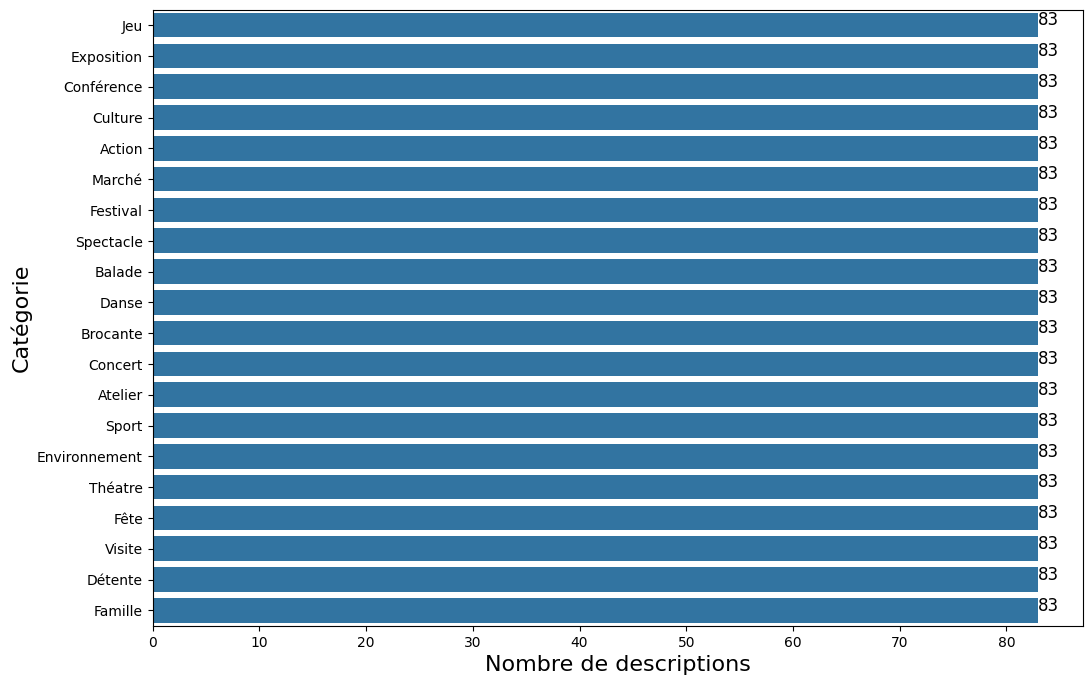

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

categories_count = df['cat1'].value_counts()

categories = categories_count.index

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)

sns.barplot(x=categories_count, y=categories, ax=ax)

for a,p in enumerate(ax.patches):
    ax.annotate(f'{categories_count[a]}', (p.get_width(), a), fontsize=12)
    
plt.xlabel('Nombre de descriptions', fontsize=16)
plt.ylabel('Catégorie', fontsize=16)

In [32]:
#train and test set

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True  ,random_state=0)

print("Train set shape: ", df_train.shape)
print("Test set shape: ", df_test.shape)

Train set shape:  (1328, 2)
Test set shape:  (332, 2)


In [33]:
df.head()

,description,cat1
0,Le jeu aventure « Les templiers du coffre d’or...,Jeu
1,"L'apparition des tanks, arme de guerre incarna...",Exposition
2,L’exposition vous invite à une plongée au cœur...,Exposition
3,"L’abbaye de Vaucelles, monument culturel du Dé...",Exposition
4,"Exposition ""Les chasseurs cyclistes au combat ...",Exposition


In [36]:
#cleaning text

import re
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import word_tokenize



def clean_text(text):
    try:
        #remove numbers
        text = re.sub(r'\d+', '', text)
        #convert text to lowercase
        text = text.lower()
        #ponctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        #url
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        #email
        text = re.sub('\S*@\S*\s?', '', text)
        #emojis
        emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        #tokenize le texte
        tokens = word_tokenize(text)
        #remove stopwords
        stops_words = set(stopwords.words("french"))
        tokens = [word for word in tokens if word not in stops_words]
        
        #stemming and remove punctuation
        stemmer = FrenchStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        
        #join all the tokens
        text = ' '.join(tokens)
        
        return text
    
    except Exception as e:
        print(f"Erreur avec le texte : {text}")
        raise e

df['clean_description'] = df['description'].apply(lambda x: clean_text(x))